# I. Import libraries and Expolatory basic dataset and Processing

In [119]:
import numpy as np
import pandas as pd

# function
import Data_Function
from Data_Function import stacked_plot, stacked_table, get_color_palettes

# visualize
import matplotlib.pyplot as plt
import seaborn as sb

# test
from scipy.stats import ttest_ind  
from scipy.stats import chi2_contingency

In [120]:
data = pd.read_csv(r'D:\DA\Tự học\Customer Churn Prediction\Dataset\Data_Raw.csv', encoding='latin-1')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [122]:
data.duplicated().sum()

np.int64(0)

In [123]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [124]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In 'TotalCharges' we have 11 null after change type, so we need check some data

In [126]:
data[data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


1. We can see that the "Tenure" column is 0 for these entries even though the "Monthlycharges" column is not empty. So we cannot fill the Total Charges column with median
2. In addition, the value columns "SeniorCitizen", "Partner", "Dependents" and "Churn" are the same
3. We will see if there are still Tenure values ​​that are 0

In [127]:
data[data['tenure'] == 0].index 

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

No additional 0 values in Tenture, so I will drop them

In [128]:
data = data[data['TotalCharges'].notnull()]

In [129]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

**Create color palettes 📶**

In [131]:
churn_1, churn_2, churn_5, churn_10 = get_color_palettes()

# II. Numerical Variable
('TotalCharges', 'MonthlyCharges', 'tenure', 'tenure_group')

In [132]:
numerical = ["MonthlyCharges", "TotalCharges", "tenure"]
data[numerical].describe()

,MonthlyCharges,TotalCharges,tenure
count,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,32.421786
std,30.085974,2266.771362,24.545260
min,18.250000,18.800000,1.000000
25%,35.587500,401.450000,9.000000
50%,70.350000,1397.475000,29.000000
75%,89.862500,3794.737500,55.000000
max,118.750000,8684.800000,72.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12852\145657204.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=data[col], palette=churn_1)


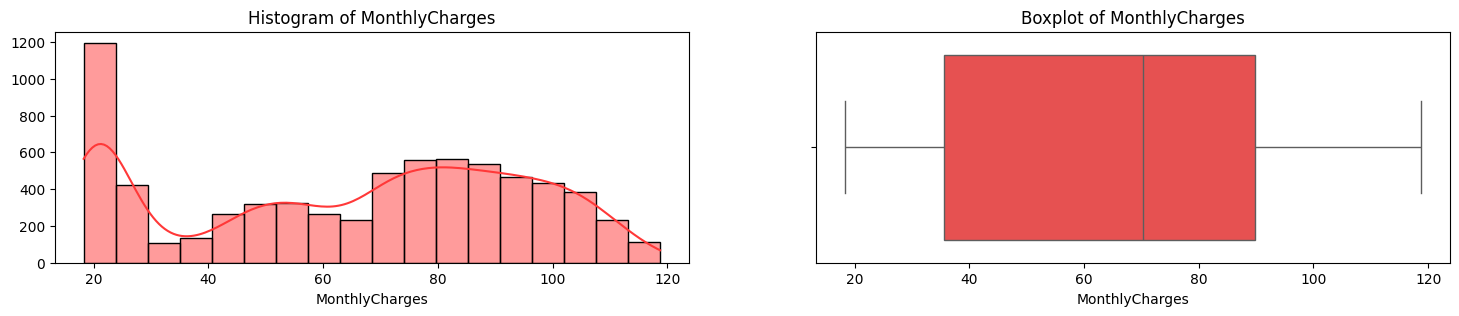

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12852\145657204.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=data[col], palette=churn_1)


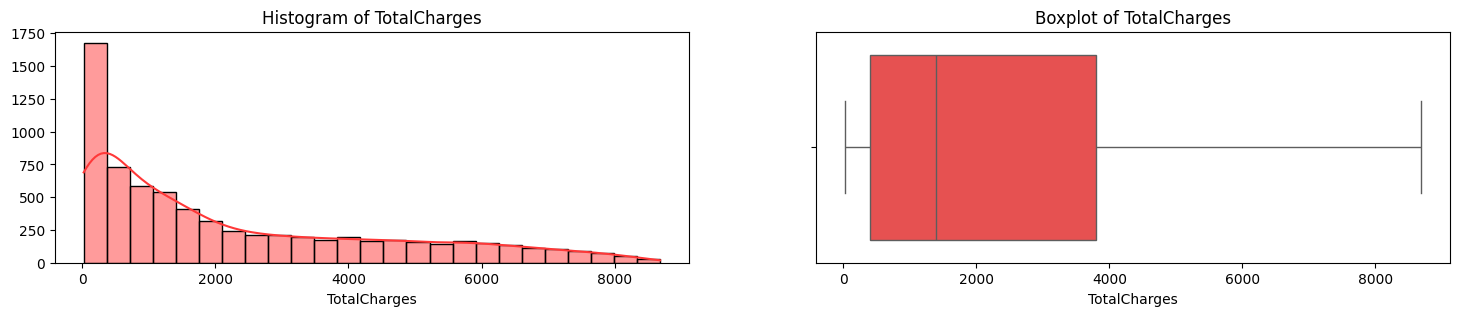

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12852\145657204.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=data[col], palette=churn_1)


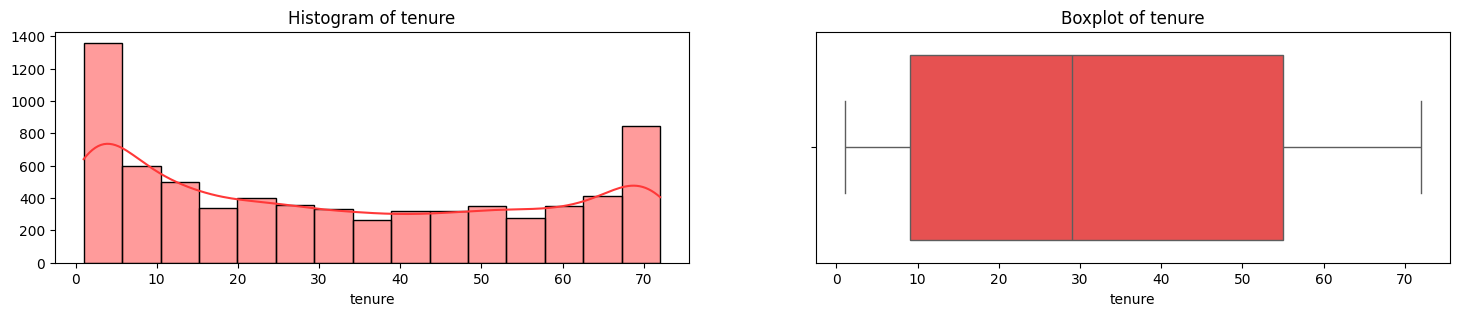

In [133]:
# numeric column (check outlier)
for col in numerical:
    plt.figure(figsize=(18, 3))
    plt.subplot(1, 2, 1)
    sb.histplot(data[col], kde=True, color=churn_1[0])
    plt.title(f'Histogram of {col}')
    # set set_ylabel('')
    plt.ylabel('')
    plt.subplot(1, 2, 2)
    sb.boxplot(x=data[col], palette=churn_1)
    plt.title(f'Boxplot of {col}')

    plt.show()

1.   TotalCharges: Right-skewed, but no outliers
2.   MonthlyCharges: The distribution is somewhat skewed but not significantly so.
3.   tenure: The distribution is quite skewed to the right, concentrated in small values.


In [134]:
Q1 = data[numerical].quantile(0.25)
Q3 = data[numerical].quantile(0.75)
IQR = Q3 - Q1
IQR
((data[numerical] < (Q1 - 1.5 * IQR)) | (data[numerical] > (Q3 + 1.5 * IQR))).any()

MonthlyCharges    False
TotalCharges      False
tenure            False
dtype: bool

No outiers in dataset

In [135]:
# customers who sign in 1 month (MonthlyCharges = TotalCharges)
data[data['TotalCharges'] == data['MonthlyCharges']] # or tenure == 1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,5351-QESIO,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,24.20,24.20,No
7010,0723-DRCLG,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
7016,1471-GIQKQ,Female,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,49.95,49.95,No
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes


In [136]:
# % customers who sign in 1 month
print(len(data[data['TotalCharges'] == data['MonthlyCharges']]) / len(data) * 100)

8.717292377701934


The number of customers registering in the first month is low, accounting for 8.7%

In [137]:
print(len(data[data['tenure'] == 1]) / len(data) * 100)

8.717292377701934


The dataset is highly accurate (tenure one-month --> so TotalCharges = MonthlyCharges)

In [138]:
data[['TotalCharges', 'MonthlyCharges', 'tenure']].corr()

,TotalCharges,MonthlyCharges,tenure
TotalCharges,1.000000,0.651065,0.825880
MonthlyCharges,0.651065,1.000000,0.246862
tenure,0.825880,0.246862,1.000000


In [139]:
x=np.corrcoef(data.TotalCharges, data.MonthlyCharges*data.tenure)
x

array([[1.        , 0.99955986],
       [0.99955986, 1.        ]])

<Axes: >

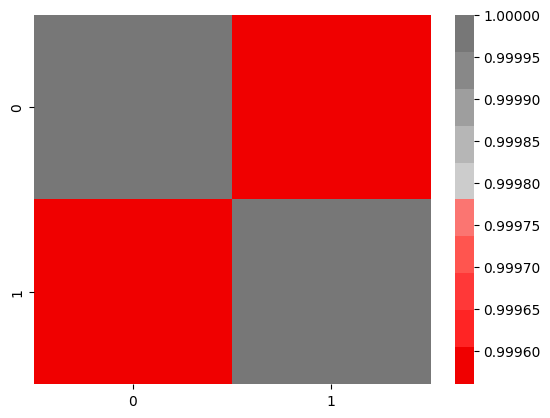

In [140]:
sb.heatmap(x, cmap=churn_10)

Correlation is very high, so we need to **drop TotalCharges or MonthlyCharges**

In [141]:
# Get the max tenure
print(data['tenure'].max())

72


Exploratory 'tenture' by month is a lot, we need to group it by year group

In [142]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)

In [143]:
tenure_group = data['tenure_group'].value_counts().reset_index()
tenure_group['percent'] = tenure_group['count'] / data['tenure_group'].value_counts().sum() * 100
tenure_group

,tenure_group,count,percent
0,1 - 12,2175,30.930034
1,61 - 72,1407,20.008532
2,13 - 24,1024,14.562002
3,25 - 36,832,11.831627
4,49 - 60,832,11.831627
5,37 - 48,762,10.836177


<Axes: xlabel='tenure_group', ylabel='count'>

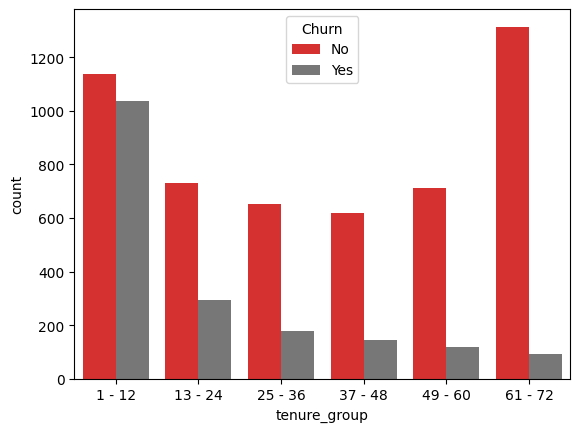

In [144]:
sb.countplot(data, x='tenure_group', hue='Churn', palette=churn_2)

In [145]:
tenure_group_1_12 = data[data['tenure_group'] == '1 - 12'].value_counts().groupby('Churn').count().reset_index()
tenure_group_1_12['percent'] = (tenure_group_1_12['count'] / tenure_group_1_12['count'].sum()) * 100
tenure_group_1_12

,Churn,count,percent
0,No,1138,52.321839
1,Yes,1037,47.678161


### Problem 1: With Churn and Non-churn, is there a difference in the number of months of service (tenure) between the two groups?

In [146]:
churn = data[data["Churn"] == 'Yes']  
non_churn = data[data["Churn"] == 'No']    

print("Mean tenure - Churn:", churn["tenure"].mean())  
print("Mean tenure - Non-Churn:", non_churn["tenure"].mean())  

Mean tenure - Churn: 17.979133226324237
Mean tenure - Non-Churn: 37.65000968429208


- On average, Churn customers have a significantly shorter usage time compared to Non-Churn. (mean 20 month)

In [147]:
t_stat, p_value = ttest_ind(non_churn["tenure"], churn["tenure"],  equal_var=False)  
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")  

T-statistic: 34.97, P-value: 0.0000


- P-value < 0.05 → There is a statistically significant difference in the number of months of use between the two groups. 

In [148]:
from scipy.stats import norm

# Tính khoảng tin cậy 95% cho sự khác biệt mean  
diff_mean = churn["tenure"].mean() - non_churn["tenure"].mean()  
std_error = np.sqrt((churn["tenure"].var()/len(churn)) + (non_churn["tenure"].var()/len(non_churn)))  

z_critical = norm.ppf(1 - (1 - 0.95)/2)  #  z* with CI 95%

ci_lower = diff_mean - z_critical * std_error  
ci_upper = diff_mean + z_critical * std_error

print(f"Mean difference: {diff_mean:.2f} months")  
print(f"CI 95%: [{ci_lower:.2f} ; {ci_upper:.2f}]")  

Mean difference: -19.67 months
CI 95%: [-20.77 ; -18.57]


### Problem 2: Customers with low TotalCharges but long tenures tend to have high churn?

In [149]:
data_check = data.copy()

data_check['Churn'] = data_check['Churn'].map({'No': 0, 'Yes': 1})
# Xác định ngưỡng (median)
tenure_med = data_check['tenure'].median()
total_med  = data_check['TotalCharges'].median()

# Tạo phân đoạn: HighTenureLowTotal nếu tenure > median & TotalCharges < median
data_check['Segment'] = np.where(
    (data_check['tenure'] > tenure_med) & (data_check['TotalCharges'] < total_med),
    'HighTenureLowTotal',
    'Other'
)
# Tính churn rate theo phân đoạn
churn_rate = data_check.groupby('Segment')['Churn'].mean().rename("ChurnRate").reset_index()
churn_rate['ChurnRate'] = churn_rate['ChurnRate']*100
churn_rate

,Segment,ChurnRate
0,HighTenureLowTotal,3.013183
1,Other,28.503307


We can see that the Churn rate of customers who low TotalCharges but long tenures are lower than the remaining customers.

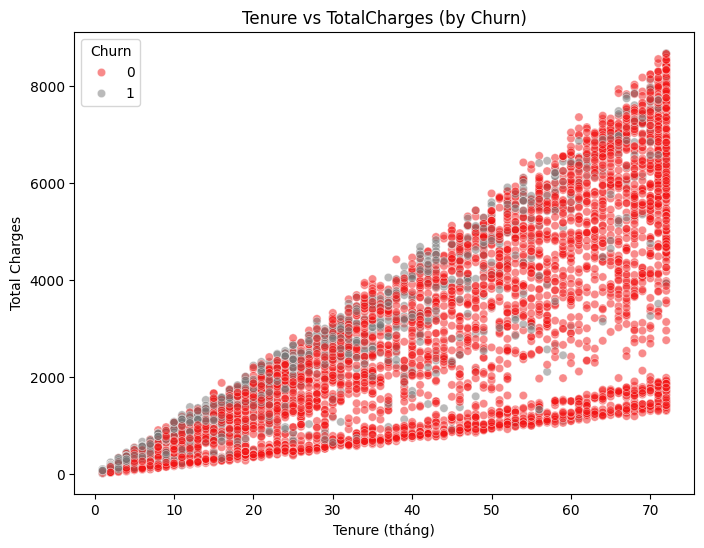

In [150]:
plt.figure(figsize=(8,6))
sb.scatterplot(
    data=data_check, x='tenure', y='TotalCharges',
    hue='Churn', alpha=0.5, palette=churn_2
)
plt.title("Tenure vs TotalCharges (by Churn)")
plt.xlabel("Tenure (tháng)")
plt.ylabel("Total Charges")
plt.show()

Observing the chart, it can be seen that most of the churn customers are in the condition of both TotalCharges and Tenure increasing, and there are no churn customers when TotalCharges is from [0,2000] and Tenure is from [50, 70]. Therefore, the above statement is wrong

# III. Categorical Variable
('CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod')   

In [151]:
data['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], shape=(7032,), dtype=object)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12852\3166841320.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=data[category_cols], x=col, ax=ax, palette=churn_1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12852\3166841320.py:14: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sb.countplot(data=data[category_cols], x=col, ax=ax, palette=churn_1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12852\3166841320.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=data[category_cols], x=col, ax=ax, palette=churn_1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12852\3166841320.py:14: UserWarning: 
The palet

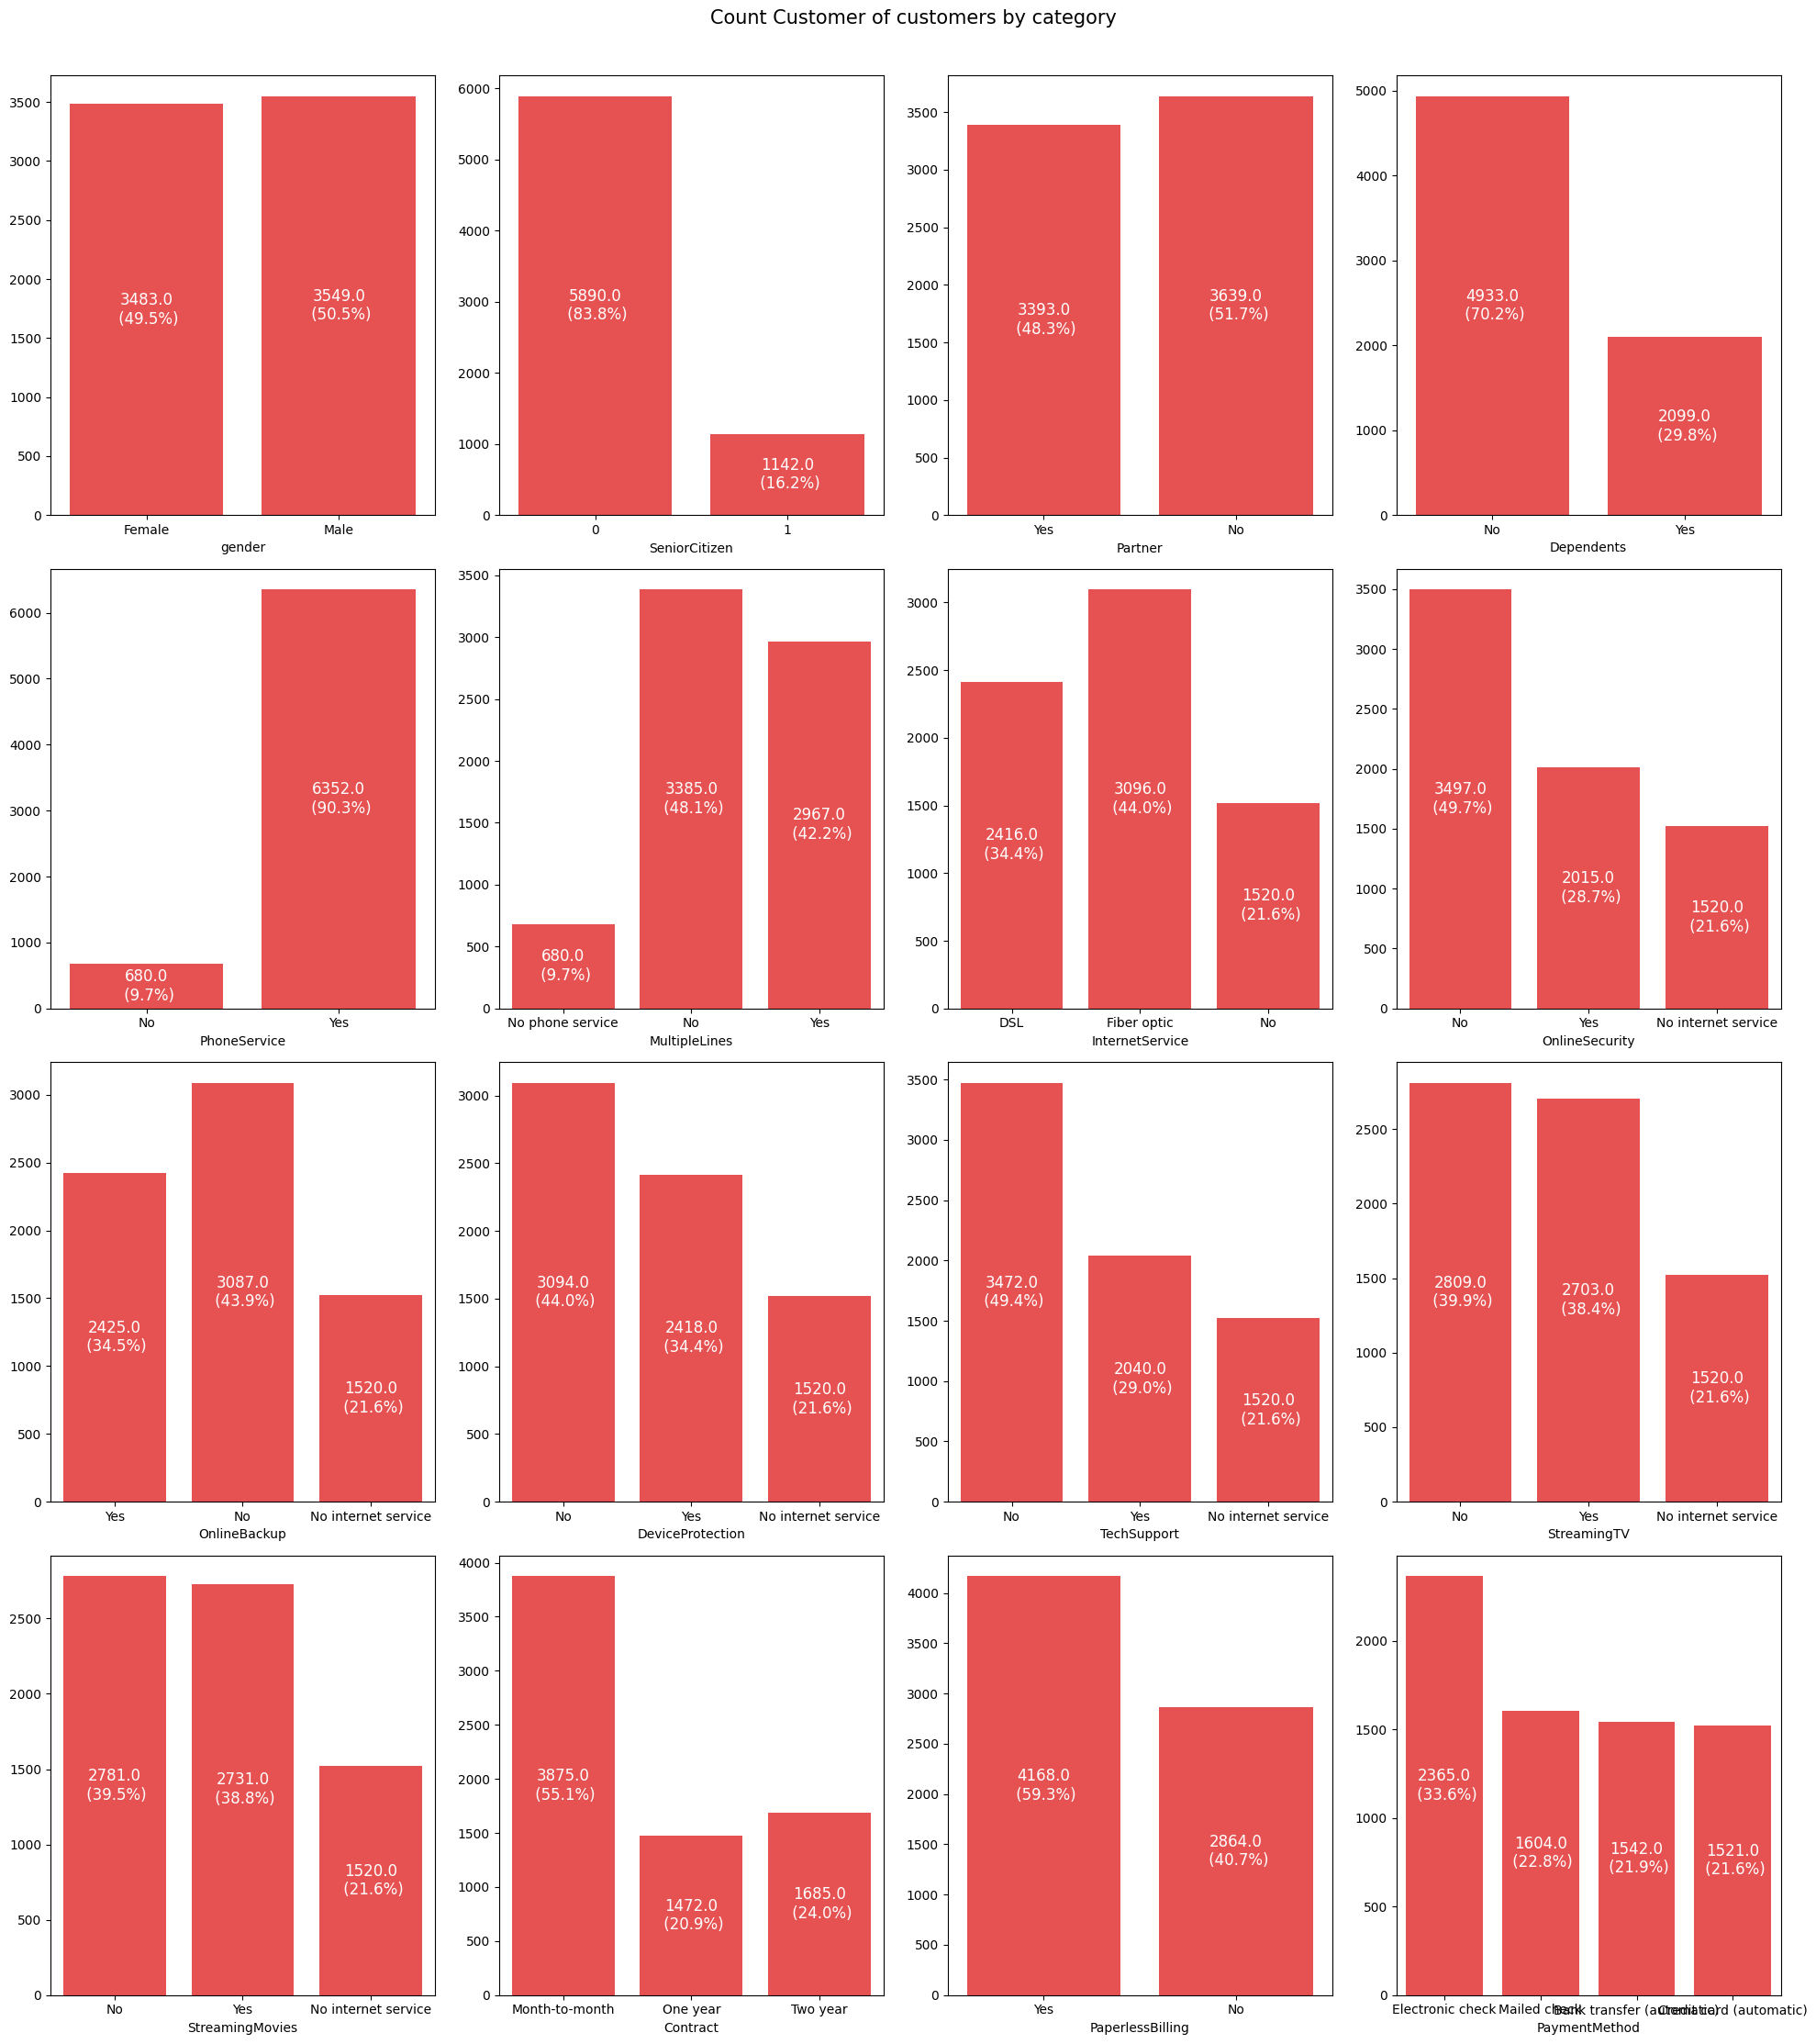

In [152]:
#Univariate Analysis
category_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Tạo Figure với 4x4 subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 22))
fig.suptitle('Count Customer of customers by category', fontsize=15, y=1.01)

for ax, col in zip(axes.flatten(), category_cols):
    total = len(data[category_cols])  # Tổng số quan sát

    # Vẽ countplot
    sb.countplot(data=data[category_cols], x=col, ax=ax, palette=churn_1)

    # Lặp qua các cột (patch) để hiển thị số và %
    for p in ax.patches:
        count = p.get_height()                       # Số lượng
        percentage = f"{100 * count / total:.1f}%"   # Tính phần trăm
        x_pos = p.get_x() + p.get_width() / 2        # Tọa độ X ở giữa cột
        y_pos = p.get_height() / 2                  # Tọa độ Y ở giữa chiều cao cột

        # Ghi chú bên trong cột
        ax.annotate(
            f"{count}\n ({percentage})",
            (x_pos, y_pos),
            ha='center',
            va='center',
            color='white',
            fontsize=12,
        )
    # Thiết lập tiêu đề và trục
    # ax.set_title(f'Customer by {col}') #, fontsize=14, fontweight='bold'
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

Analysis relationship of churn variable with other category variables

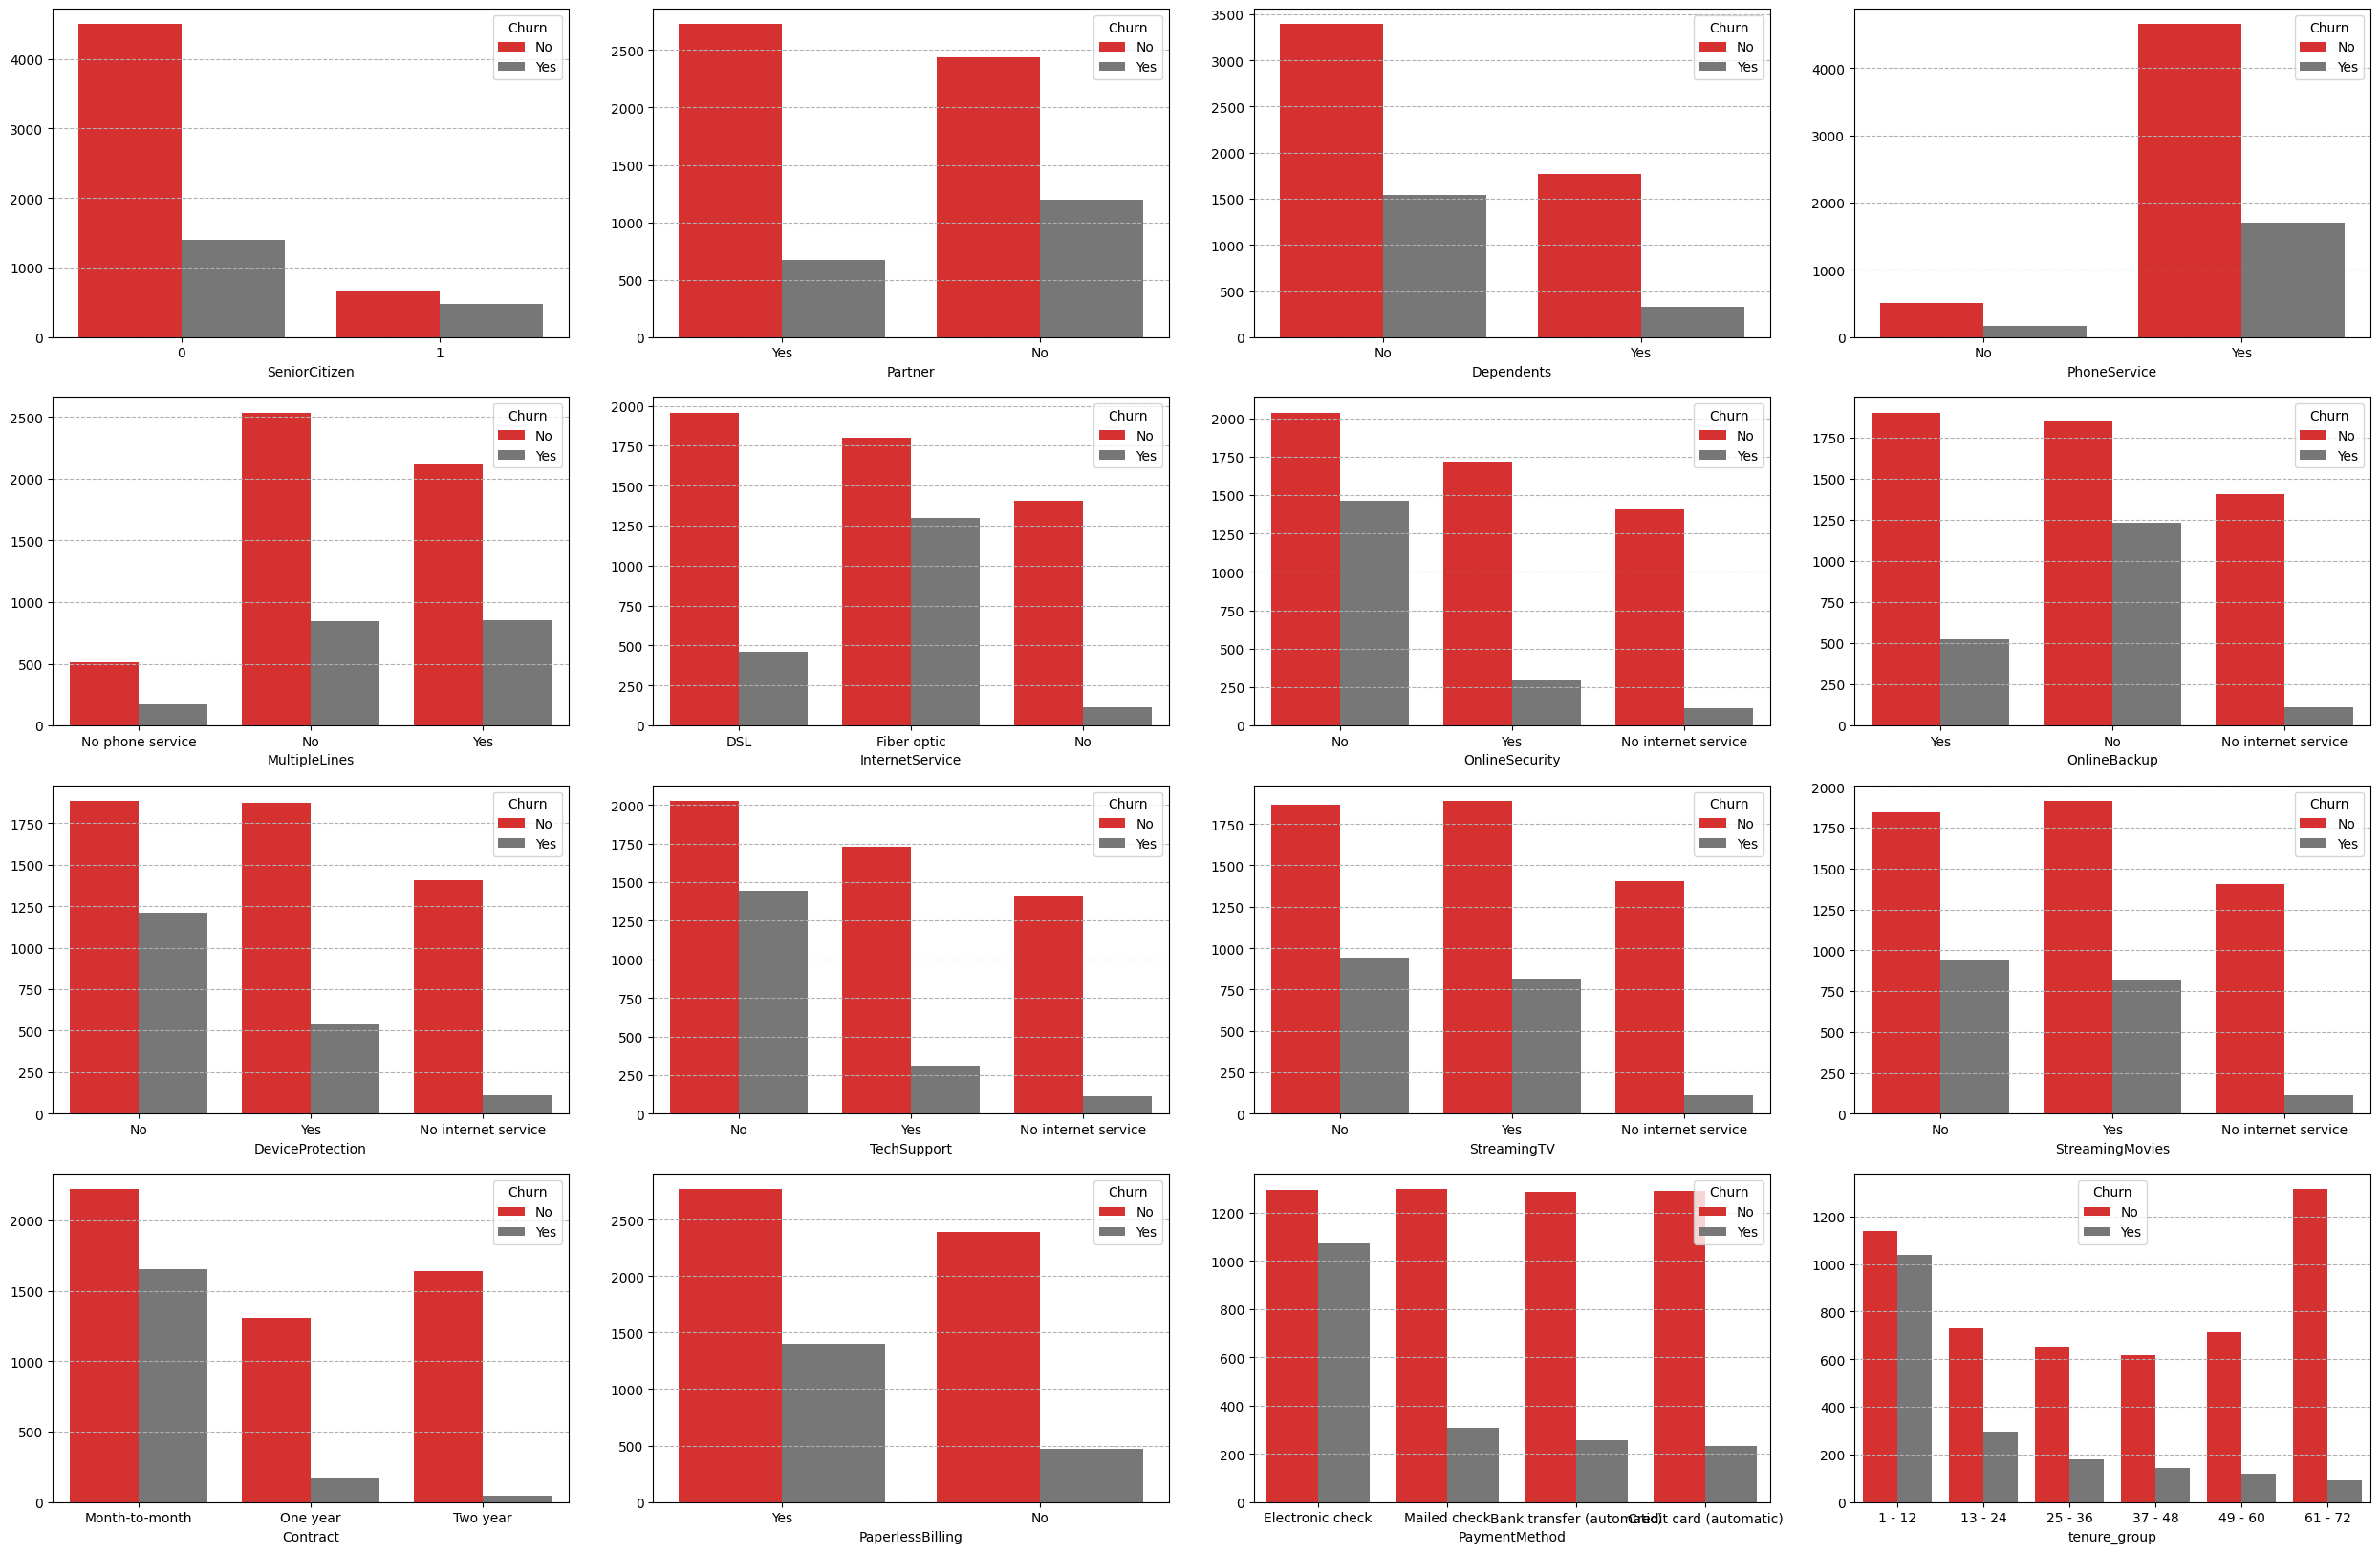

In [153]:
#Univariate Analysis: Phân tích đa biến
# Danh sách cột cần vẽ
cols = ['SeniorCitizen', 'Partner', 'Dependents','PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']

# Tạo subplots với 4 hàng, 5 cột
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
axes = axes.flatten()  # Chuyển mảng 2D về 1D để dễ duyệt

# Vẽ từng biểu đồ
for i, col in enumerate(cols):
    sb.countplot(data=data, x=col, hue='Churn', ax=axes[i], palette=churn_2)
    # set grid
    axes[i].grid(True, axis='y', linestyle='--')
    axes[i].set_ylabel('')

# Xóa các subplot trống nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Observation: Things to note**
1. In 'SeniorCitizen', most younger customers use the service more than older customers and have a higher churn rate, but we need to dig deeper to discover
2. In 'Contract': Customers with one- or two-year contracts rarely leave the service.  
3. In 'tenture_group', we can see most customers will care more about service in the next 12 months - this time are very important. When they are using to using, some customers will not churn much over time.

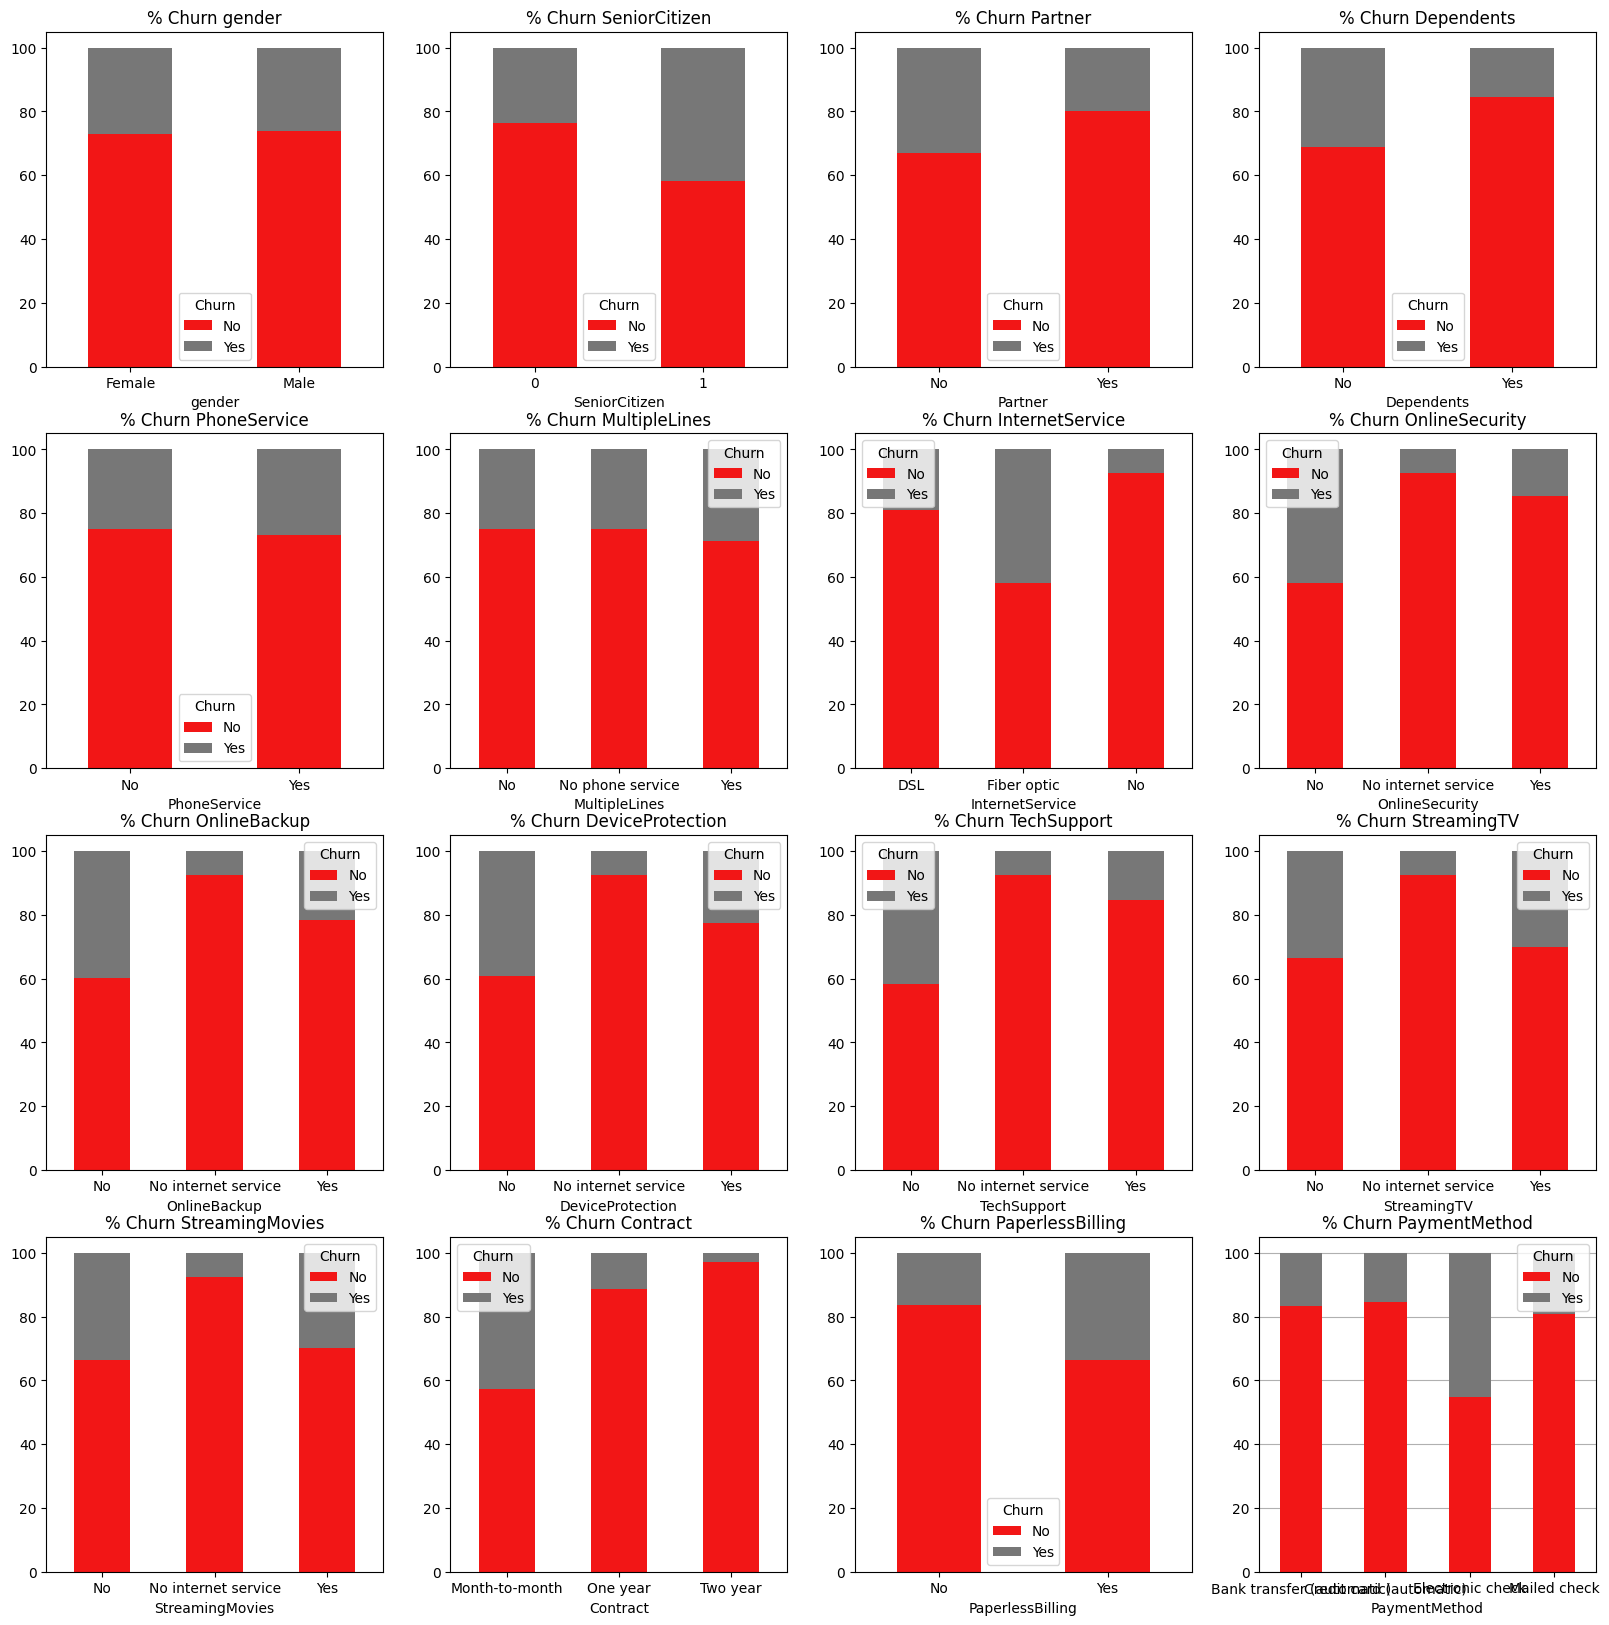

In [154]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(category_cols):
    stacked_plot(data, col, 'Churn', axes[i], colors=churn_2)

In [155]:
for col in category_cols:
    print(f"\n==== {col} vs Churn ====")
    display(stacked_table(data, col, 'Churn'))


==== gender vs Churn ====


,Churn_No (%),Churn_Yes (%)
gender,,
Female,73.04,26.96
Male,73.80,26.20



==== SeniorCitizen vs Churn ====


,Churn_No (%),Churn_Yes (%)
SeniorCitizen,,
0,76.35,23.65
1,58.32,41.68



==== Partner vs Churn ====


,Churn_No (%),Churn_Yes (%)
Partner,,
No,67.02,32.98
Yes,80.28,19.72



==== Dependents vs Churn ====


,Churn_No (%),Churn_Yes (%)
Dependents,,
No,68.72,31.28
Yes,84.47,15.53



==== PhoneService vs Churn ====


,Churn_No (%),Churn_Yes (%)
PhoneService,,
No,75.00,25.00
Yes,73.25,26.75



==== MultipleLines vs Churn ====


,Churn_No (%),Churn_Yes (%)
MultipleLines,,
No,74.92,25.08
No phone service,75.00,25.00
Yes,71.35,28.65



==== InternetService vs Churn ====


,Churn_No (%),Churn_Yes (%)
InternetService,,
DSL,81.00,19.00
Fiber optic,58.11,41.89
No,92.57,7.43



==== OnlineSecurity vs Churn ====


,Churn_No (%),Churn_Yes (%)
OnlineSecurity,,
No,58.22,41.78
No internet service,92.57,7.43
Yes,85.36,14.64



==== OnlineBackup vs Churn ====


,Churn_No (%),Churn_Yes (%)
OnlineBackup,,
No,60.06,39.94
No internet service,92.57,7.43
Yes,78.43,21.57



==== DeviceProtection vs Churn ====


,Churn_No (%),Churn_Yes (%)
DeviceProtection,,
No,60.86,39.14
No internet service,92.57,7.43
Yes,77.46,22.54



==== TechSupport vs Churn ====


,Churn_No (%),Churn_Yes (%)
TechSupport,,
No,58.35,41.65
No internet service,92.57,7.43
Yes,84.80,15.20



==== StreamingTV vs Churn ====


,Churn_No (%),Churn_Yes (%)
StreamingTV,,
No,66.46,33.54
No internet service,92.57,7.43
Yes,69.89,30.11



==== StreamingMovies vs Churn ====


,Churn_No (%),Churn_Yes (%)
StreamingMovies,,
No,66.27,33.73
No internet service,92.57,7.43
Yes,70.05,29.95



==== Contract vs Churn ====


,Churn_No (%),Churn_Yes (%)
Contract,,
Month-to-month,57.29,42.71
One year,88.72,11.28
Two year,97.15,2.85



==== PaperlessBilling vs Churn ====


,Churn_No (%),Churn_Yes (%)
PaperlessBilling,,
No,83.62,16.38
Yes,66.41,33.59



==== PaymentMethod vs Churn ====


,Churn_No (%),Churn_Yes (%)
PaymentMethod,,
Bank transfer (automatic),83.27,16.73
Credit card (automatic),84.75,15.25
Electronic check,54.71,45.29
Mailed check,80.80,19.20


The churn rates between the values ​​in the **Gender, PhoneService, MultipleLines** columns are almost the same, with no obvious difference.

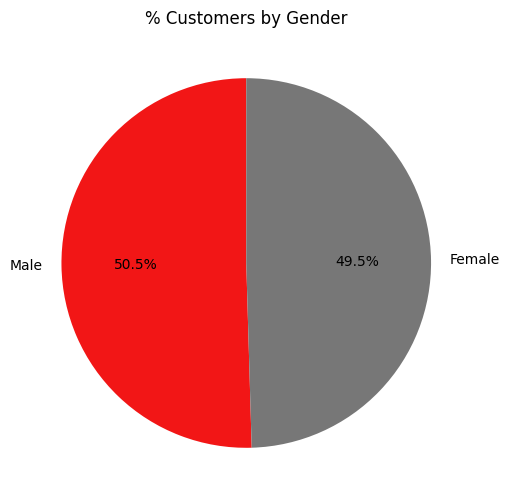

In [156]:
# số lượng người đăng ký theo gender
plt.figure(figsize=(6, 6))
plt.pie(data['gender'].value_counts(), labels=data['gender'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=churn_2)
plt.title('% Customers by Gender')
plt.show()

The ratio of male and female is the same, it seems that Churn is not related to **Gender**

In [157]:
senior_citizen_by_tenure_group = data.groupby(['tenure_group', 'SeniorCitizen']).size().unstack(fill_value=0)
senior_citizen_by_tenure_group

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12852\1452315215.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  senior_citizen_by_tenure_group = data.groupby(['tenure_group', 'SeniorCitizen']).size().unstack(fill_value=0)


SeniorCitizen,0,1
tenure_group,,
1 - 12,1855,320
13 - 24,856,168
25 - 36,674,158
37 - 48,639,123
49 - 60,685,147
61 - 72,1181,226


In [158]:
# demographic
display(pd.crosstab(data['gender'], [data['SeniorCitizen'], data['Partner'], data['Dependents']], dropna=False))

SeniorCitizen     0                   1             
Partner          No       Yes        No      Yes    
Dependents       No  Yes   No  Yes   No Yes   No Yes
gender                                              
Female         1338  142  596  839  317   3  209  39
Male           1381  209  567  818  244   5  281  44

In [159]:
## phone service, multiple lines, internet service
display(pd.crosstab(data['Churn'], [data['PhoneService'], data['MultipleLines'], data['InternetService']], dropna=False))

PhoneService     No                                                     \
MultipleLines    No                No phone service                Yes   
InternetService DSL Fiber optic No              DSL Fiber optic No DSL   
Churn                                                                    
No                0           0  0              510           0  0   0   
Yes               0           0  0              170           0  0   0   

PhoneService                    Yes                                     \
MultipleLines                    No                   No phone service   
InternetService Fiber optic No  DSL Fiber optic    No              DSL   
Churn                                                                    
No                        0  0  831         628  1077                0   
Yes                       0  0  216         530   103                0   

PhoneService                                          
MultipleLines                   Yes                   
InternetService Fiber optic No  DSL Fiber optic   No  
Churn                                                 
No                        0  0  616        1171  330  
Yes                       0  0   73         767   10

When customers do not use PhoneService, using Digital Subscriber Line (**DSL**) for Internet Service affects churn the most. If PhoneService is used, **Fiber optic** affects the most.

In [160]:
data[data['PhoneService'] == 'No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,1 - 12
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1 - 12
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,4501-VCPFK,Male,0,No,No,26,No,No phone service,DSL,No,...,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50,No,25 - 36
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No,61 - 72
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No,1 - 12
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No,1 - 12


When a customer **doesn't using PhoneService**, it means they are in the **No Phone Service** case for MultipleLine and use Digital Subscriber Line (**DSL**) for InternetService. (I checked further in PowerBI)

In [161]:
display(pd.crosstab(data['Churn'], [data['OnlineBackup'], data['DeviceProtection'], data['TechSupport'], data['OnlineSecurity'], data['StreamingTV']], dropna=False))

OnlineBackup       No                                               \
DeviceProtection   No                                                
TechSupport        No                                                
OnlineSecurity     No                          No internet service   
StreamingTV        No No internet service  Yes                  No   
Churn                                                                
No                396                   0  153                   0   
Yes               482                   0  236                   0   

OnlineBackup                                                           \
DeviceProtection                                                        
TechSupport                                                             
OnlineSecurity                            Yes                           
StreamingTV      No internet service Yes   No No internet service Yes   
Churn                                                                   
No                                 0   0  151                   0  65   
Yes                                0   0   60                   0  32   

OnlineBackup                          ...                 Yes      \
DeviceProtection                      ...                 Yes       
TechSupport      No internet service  ... No internet service Yes   
OnlineSecurity                    No  ...                 Yes  No   
StreamingTV                       No  ...                 Yes  No   
Churn                                 ...                           
No                                 0  ...                   0  49   
Yes                                0  ...                   0   9   

OnlineBackup                                                   \
DeviceProtection                                                
TechSupport                                                     
OnlineSecurity                            No internet service   
StreamingTV      No internet service  Yes                  No   
Churn                                                           
No                                 0  167                   0   
Yes                                0   30                   0   

OnlineBackup                                                            
DeviceProtection                                                        
TechSupport                                                             
OnlineSecurity                            Yes                           
StreamingTV      No internet service Yes   No No internet service  Yes  
Churn                                                                   
No                                 0   0  122                   0  322  
Yes                                0   0    7                   0   18  

[2 rows x 243 columns]

When I check the combination in PowerBI, I see that if **InternetService = 'No'**, then **all the above services** will also be set as **'No internet service'** which is logical and reflects the uniformity in the service. In short, we can see that 'PhoneService' is related to 'InternetService'


Churn
No     5163
Yes    1869
Name: count, dtype: int64


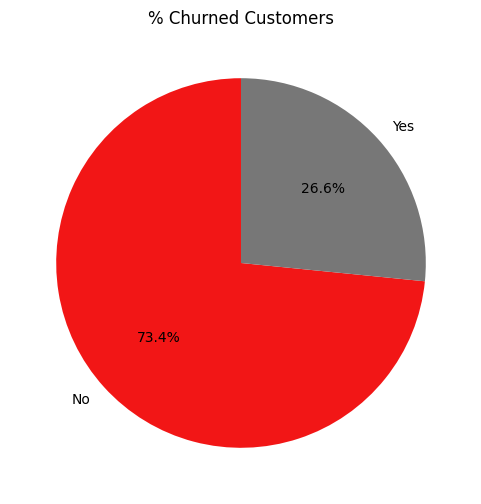

In [162]:
# Pie chart about 'churn'
churn_counts = data['Churn'].value_counts()
print(churn_counts)
# Vẽ Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=churn_2)
plt.title('% Churned Customers')
plt.show()

The "No" class (not churn) accounts for 73.4%, the "Yes" class (churn) only 26.6%. This is **unbalanced data** because the difference ratio > 7:3, so we need to solve the problem

In [163]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Problem 1: Do customers on short-term contracts (Month-to-month) have higher churn rates than those on long-term contracts?

In [164]:
display(pd.crosstab(data['Contract'], data['Churn'], dropna=False))


Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


In [165]:
stacked_table(data, 'Contract', 'Churn')

,Churn_No (%),Churn_Yes (%)
Contract,,
Month-to-month,57.29,42.71
One year,88.72,11.28
Two year,97.15,2.85


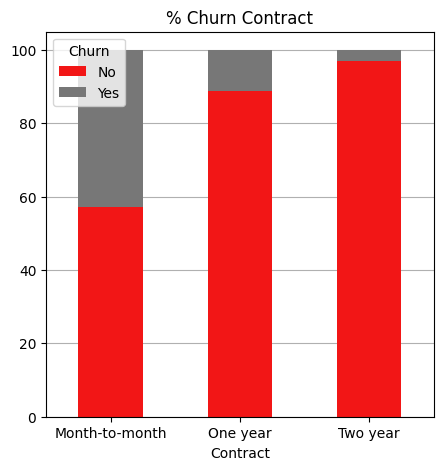

In [166]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
stacked_plot(data, 'Contract', 'Churn', ax, colors=churn_2)


- The nearly 50:50 split shows that short-term contract customers (Month-Month) have a higher churn rate than One Year (11% churn) and Two Year (3% churn)
- In addition, short-term contract customers have a larger customer base than longer contracts due to the influx of new customers coming in to experience the service. Therefore, it is understandable that customers are more likely to leave in the first year

### Problem 2: Customers who use manual pay (Electronic check, Mail Check) are more likely to churn than auto-pay (Credit card, Bank transfer)?

In [167]:
display(pd.crosstab(data['PaymentMethod'], data['Churn'], dropna=False))


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


It is easy to see that the number of customers leaving Electronic check is much higher than Bank transfer and Credit card

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12852\2197970121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=data, x='PaymentMethod', y='TotalCharges', palette=churn_1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12852\2197970121.py:2: UserWarning: 
The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sb.barplot(data=data, x='PaymentMethod', y='TotalCharges', palette=churn_1)


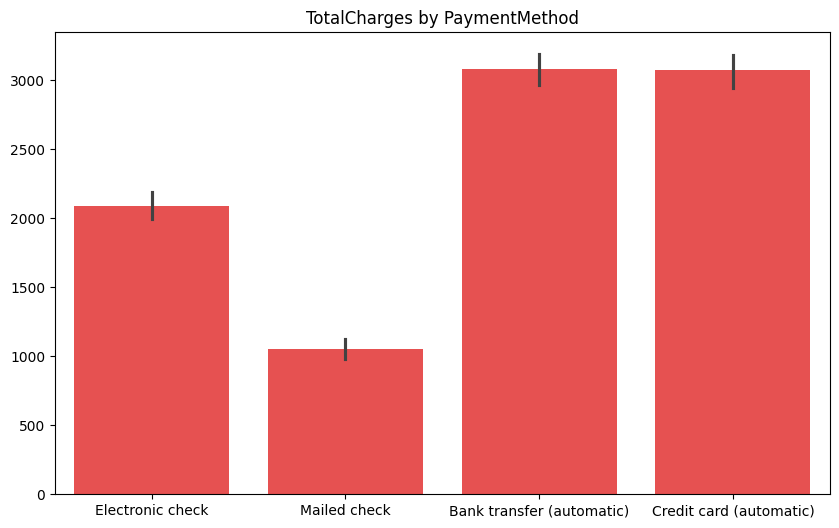

In [168]:
plt.figure(figsize=(10,6))
sb.barplot(data=data, x='PaymentMethod', y='TotalCharges', palette=churn_1)
plt.title("TotalCharges by PaymentMethod")
plt.ylabel("")
plt.xlabel("")
plt.show()

It can be seen that TotalCharges with Bank transfer (automatic) and Credit card (automatic) are always higher than Electronic check and Mailed check, giving customers confidence and therefore spending more

In [169]:
display(pd.crosstab(data['tenure_group'], [data['PaymentMethod'], data['Churn']], dropna=False))


PaymentMethod Bank transfer (automatic)      Credit card (automatic)      \
Churn                                No  Yes                      No Yes   
tenure_group                                                               
1 - 12                              124  103                     143  81   
13 - 24                             138   39                     139  42   
25 - 36                             153   29                     159  29   
37 - 48                             163   31                     160  31   
49 - 60                             205   34                     206  19   
61 - 72                             501   22                     482  30   

PaymentMethod Electronic check      Mailed check       
Churn                       No  Yes           No  Yes  
tenure_group                                           
1 - 12                     372  606          499  247  
13 - 24                    196  184          257   29  
25 - 36                    179  105          161   17  
37 - 48                    165   71          129   12  
49 - 60                    182   65          119    2  
61 - 72                    200   40          131    1

### Problem 3: Customers who register for ≥ 2 services (Phone, Internet, TV) have lower churn than those who register for only 1 service

In [170]:
data_check['NumServices'] = (
    (data_check['PhoneService'] == 'Yes').astype(int) +
    (data_check['InternetService'] != 'No').astype(int) +
    (data_check['StreamingTV'] == 'Yes').astype(int)
)

# Phân loại: 1 dịch vụ vs từ 2 dịch vụ trở lên
data_check['BundleGroup'] = np.where(data_check['NumServices'] >= 2, 'Multi-Service', 'Single-Service')

# Churn_n: 0/1
data_check['Churn_n'] = (data_check['Churn'] == 'Yes').astype(int)

# Tính churn rate theo nhóm
churn_rate = (
    data_check.groupby('BundleGroup')['Churn_n']
    .mean()
    .rename('ChurnRate')
    .reset_index()
)

print(churn_rate)

      BundleGroup  ChurnRate
0   Multi-Service        0.0
1  Single-Service        0.0


In [171]:
# Tạo bảng tần số (contingency table)
ct = pd.crosstab(data_check['BundleGroup'], data_check['Churn'])

# Chi-squared test
chi2, p_value, dof, expected = chi2_contingency(ct)

print(f"Chi-squared Statistic = {chi2:.2f}")
print(f"P-value = {p_value:.4f}")

Chi-squared Statistic = 309.09
P-value = 0.0000


In [172]:
data_copy = data.copy()
data_copy['Churn_n'] = data_copy['Churn'].map({'No': 0, 'Yes': 1})

In [173]:
# Đánh dấu có Internet hay không
data_copy['HasInternet'] = np.where(data_copy['InternetService'] == 'No', 0, 1)
# Đánh dấu có TV streaming hay không
data_copy['HasTV'] = np.where(data_copy['StreamingTV'] == 'Yes', 1, 0)
# Đánh dấu có Phone service hay không
data_copy['HasPhone'] = np.where(data_copy['PhoneService'] == 'Yes', 1, 0)

In [174]:
# Tính số dịch vụ mỗi khách hàng đăng ký
data_copy['NumServices'] = data_copy[['HasPhone','HasInternet','HasTV']].sum(axis=1)
# Phân nhóm: Single (1 dịch vụ) vs Multi (>=2 dịch vụ)
data_copy['BundleGroup'] = np.where(data_copy['NumServices'] >= 2, 'Multi-Service', 'Single-Service')

In [175]:
# Tính churn rate
churn_rate = (
    data_copy.groupby('BundleGroup')['Churn_n']
      .mean()
      .reset_index()
)
churn_rate['Churn_n'] = (churn_rate['Churn_n'] * 100).round(2)
print(churn_rate)

      BundleGroup  Churn_n
0   Multi-Service    32.26
1  Single-Service    11.42


### Problem 4: Do Customers with Dependents = Yes churn less, because they need to stay in touch?

In [176]:
# 2. Tính churn rate theo Dependents
churn_rate = (
    data_check
    .groupby('Dependents')['Churn']
    .mean()              # Trung bình 0/1 = tỷ lệ churn
    .reset_index()
)
churn_rate['Churn'] = churn_rate['Churn'] * 100
churn_rate

,Dependents,Churn
0,No,31.279140
1,Yes,15.531205


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12852\1432186507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=churn_rate, x='Dependents', y='Churn', palette=churn_1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12852\1432186507.py:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sb.barplot(data=churn_rate, x='Dependents', y='Churn', palette=churn_1)


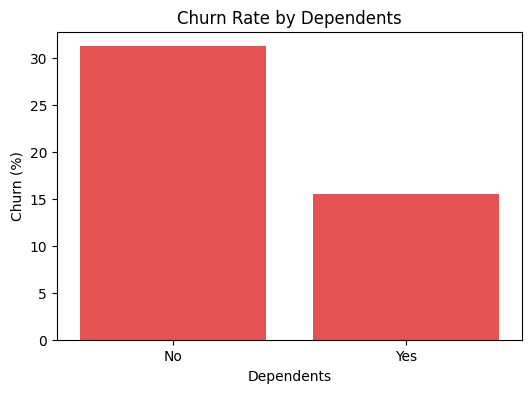

In [177]:
# 3. Vẽ bar chart
plt.figure(figsize=(6,4))
sb.barplot(data=churn_rate, x='Dependents', y='Churn', palette=churn_1)
plt.title("Churn Rate by Dependents")
plt.ylabel("Churn (%)")
plt.show()

In [178]:
# to csv
data.to_csv('D:\DA\Tự học\Customer Churn Prediction\Dataset\Data_Analysis.csv', index=False)

# IV. Conclusion

I. Import libraries and Expolatory basic dataset and Processing

- **No outiers** in dataset

- About Dataset: Highly accurate data. **7:3 churn rate imbalance** will affect the forecasting model, so I decided to evaluate model with appropriate metrics.

- Columns need to drop: **Gender, CustomerID, tenure_group.**

II. Numerical Variable
      
  - **Right-skewed** Distribution

  - The number of customers registering in the first month is low, accounting for 8.7%

  - There is a **high correlation** between **TotalCharges** and **tenure*MonthlyCharges**

  - Problem 1 - Insight:
    - Churn customers have a significantly shorter usage time compared to Non-Churn

    - Focus on customer care in the first 18 months - the critical period for whether customers will churn or not

  
  - Problem 2 - Insight:
    - Customers who use a low-cost service for a long time do not affect churn, but customers who sign up for a very cheap package with only a few basic services

    - Upsell + promotion: Actively encourage customers to upgrade to a higher-end package with more utilities + extra service time. This will be beneficial in the long run.

III. Categorical Variable

  - The churn rates between the values ​​in the **Gender, PhoneService, MultipleLines** columns are almost the same, with no obvious difference. 

  - InternetService's use of **Fiber optic** has a major impact on customer churn.

  - Problem 1 - Insight:
    - Retaining customers in the first stage (< 1 year) is the most important and necessary
    
    - And we also need to provide customer incentives for switching to a long-term package

  - Problem 2 - Insight

    - Customers signing up for automatic payments shows that they trust the service, are not afraid to spend, and use the service long-term.

    - For manual payments, they do not have trust, as evidenced by the large number of customers registering in the first 2 years (Electronic check and Mailed check).

  - Problem 3 - Insight

    - Customers who use multiple services often have higher total costs, but there are some unused factors

    - They are used to it, less likely to switch all services to another provider.

  - Problem 4 - Insight:
    - Customers who have relatives and often maintain contact with family and relatives tend to stay longer

    - Suggest promotional programs such as Family & Friends Package: discount if adding relatives' phone numbers.

  - Table of service element dependencies to 'PhoneService' and 'InternetService'

      | Service | InternetService = 'No'| PhoneService = 'No' |
      | --- | --- | --- |
      | PhoneService | Yes | No |
      | InternetService | No | DSL |
      | MultipleLines | Yes or No | No Phone Service |
      | OnlineSecurity | No internet service | No Affect |
      | OnlineBackup | No internet service | No Affect |
      | DeviceProtection | No internet service | No Affect |
      | TechSupport | No internet service | No Affect |
      | StreamingTV | No internet service | No Affect |
      | StreamingMovies | No internet service | No Affect |
